<a href="https://colab.research.google.com/github/csabiu/Astrostatistics/blob/main/GAIA_HR_KMeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install astroquery

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 910.2/910.2 kB 18.0 MB/s eta 0:00:00


In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.coordinates import (SkyCoord, Distance, Galactic,
                                 EarthLocation, AltAz)
import astropy.coordinates as coord
from astropy.time import Time
from astropy import units as u
from astropy.coordinates import AltAz
from astropy.io import fits
from astropy.table import QTable
from astropy.utils.data import download_file
from astroquery.gaia import Gaia

In [ ]:
job = Gaia.launch_job_async("SELECT TOP 10000 gaia.parallax, gaia.source_id,gaia.ref_epoch,gaia.ra,gaia.dec,gaia.l,gaia.b,gaia.parallax_error,gaia.pmra,gaia.pmra_error,gaia.pmdec,gaia.pmdec_error, gaia.phot_g_n_obs,gaia.phot_g_mean_mag,gaia.bp_rp,gaia.radial_velocity,gaia.radial_velocity_error, gaia.rv_template_teff, gaia.ag_gspphot "
                        "FROM gaiadr3.gaia_source AS gaia "
                        "WHERE gaia.parallax/gaia.parallax_error > 10.0 AND "
                        "gaia.parallax < 0.32 AND "
                        "gaia.parallax > 0.3 ",
                      dump_to_file=True, output_format='votable',)

In [ ]:
r = job.get_results()

In [ ]:
ra=np.asarray(r['ra'].value)
dec=np.asarray(r['dec'].value)
par=np.asarray(r['parallax'].value)
par_err=np.asarray(r['parallax_error'].value)
mag=np.asarray(r['phot_g_mean_mag'].value)
ex=np.asarray(r['ag_gspphot'].value)
bmr =np.asarray(r['bp_rp'].value)

bmr[7445]=0 # i found a bad value

sn=par/par_err

print('dr3 has ',par.shape,' cepheids')

b=np.asarray(r['b'].value)
l=np.asarray(r['l'].value)

dr3 has  (10000,)  cepheids


The Hertsprung-Russell (HR) Diagram is used to classify stars in type and evolution

Here we see the main sequence of star formation and a sub-cloud of white dwarfs

We will use this data-set to do some ML clustering!

Text(0, 0.5, '$M_g$')

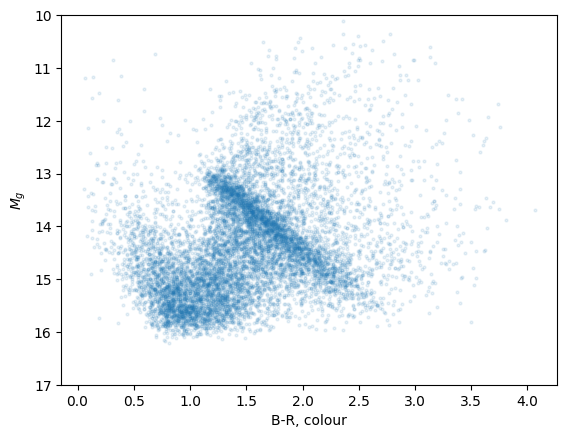

In [ ]:
plt.scatter(bmr,mag,s=4,alpha=.1)
plt.ylim((17,10))
plt.xlabel(r'B-R, colour')
plt.ylabel(r'$M_g$')

Text(0, 0.5, '$M_g$')

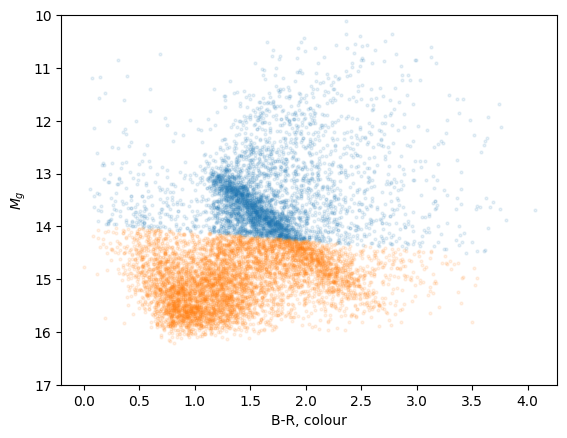

In [ ]:
from sklearn.cluster import KMeans, BisectingKMeans
from sklearn import preprocessing


X = np.vstack([bmr,mag]).T

ncluster = 2

clf = KMeans(n_clusters=ncluster,) #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2', 'C3']
for ii in range(ncluster):
    plt.scatter(X[labels==ii,0], X[labels==ii,1],
                color=colors[ii],s=4,alpha=0.1)
plt.ylim((17,10))
plt.xlabel(r'B-R, colour')
plt.ylabel(r'$M_g$')

In [1]:
k_range = [2,3,4,5,6,7]

wss = []
for i, k in enumerate(k_range):
    kmeans = KMeans(k)
    kmeans.fit(X)
    wss.append((k, ((X - kmeans.cluster_centers_[kmeans.labels_]) ** 2).sum()))



NameError: name 'np' is not defined

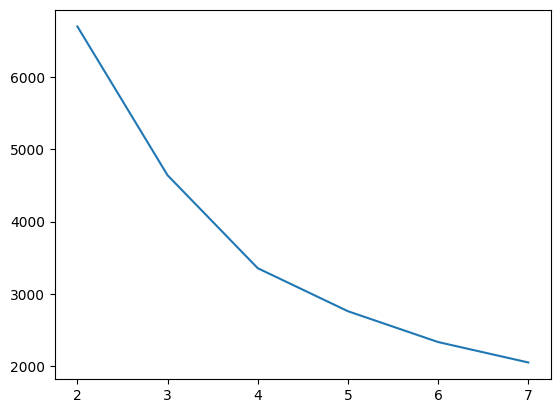

In [121]:
wss=np.asarray(wss)
wss

plt.plot(wss[:,0],wss[:,1])

In [ ]:
ncluster = 4

clf = KMeans(n_clusters=ncluster,) #Try 2 clusters to start with
clf.fit(X)
centers = clf.cluster_centers_ #location of the clusters
labels = clf.predict(X) #labels for each of the points

# plot the data color-coded by cluster id
colors = ['C0', 'C1', 'C2', 'C3']
for ii in range(ncluster):
    plt.scatter(X[labels==ii,0], X[labels==ii,1],
                color=colors[ii],s=4,alpha=0.1)
plt.ylim((17,10))
plt.xlabel(r'B-R, colour')
plt.ylabel(r'$M_g$')

(array([], dtype=int64),)